In [56]:
import pandas as pd
import numpy as np
import random

# Load the dataset
file_path = r"C:\Users\madhu\OneDrive\Desktop\project\new data.csv"  # Change if needed
df = pd.read_csv(file_path)

# Ensure required columns exist before processing
required_columns = ['Age', 'Gender', 'Height', 'Weight', 'Exercise_Intensity', 'Medical_Conditions']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Calculate BMI
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

# Function to estimate caloric needs (TDEE Formula)
def estimate_calories(row):
    activity_factors = {
        'Sedentary': 1.2,
        'Light': 1.375,
        'Moderate': 1.55,
        'Vigorous': 1.725
    }
    
    # Basal Metabolic Rate (BMR) Calculation
    if row['Gender'] == 'Male':
        bmr = 10 * row['Weight'] + 6.25 * row['Height'] - 5 * row['Age'] + 5
    else:
        bmr = 10 * row['Weight'] + 6.25 * row['Height'] - 5 * row['Age'] - 161
    
    return round(bmr * activity_factors.get(row['Exercise_Intensity'], 1.2))

df['Caloric Needs (kcal)'] = df.apply(estimate_calories, axis=1)

# Assign Macro Preferences based on activity and health conditions
def assign_macro_pref(row):
    if isinstance(row['Medical_Conditions'], str) and 'Diabetes' in row['Medical_Conditions']:
        return 'Balanced'
    elif row['Exercise_Intensity'] in ['Moderate', 'Vigorous']:
        return 'High Protein'
    elif row['BMI'] > 25:
        return 'Low Carb'
    else:
        return 'High Carb'

df['Macro Preference'] = df.apply(assign_macro_pref, axis=1)

# Assign Diet Type randomly (for demonstration)
df['Diet Type'] = np.random.choice(['Vegetarian', 'Vegan', 'Non-Vegetarian'], size=len(df))

# Assign Meal Plans based on Macro Preference & Diet Type
meal_plans = {
    'High Protein': {
        'Vegetarian': 'Lentil Soup, Greek Yogurt, Tofu Stir-fry',
        'Vegan': 'Quinoa Salad, Chickpea Curry, Peanut Butter Oats',
        'Non-Vegetarian': 'Grilled Chicken, Eggs, Salmon with Brown Rice'
    },
    'Balanced': {
        'Vegetarian': 'Oats, Paneer Salad, Mixed Nuts, Whole Wheat Roti',
        'Vegan': 'Avocado Toast, Hummus Wrap, Vegan Smoothie',
        'Non-Vegetarian': 'Chicken Wrap, Tuna Sandwich, Stir-fried Vegetables'
    },
    'Low Carb': {
        'Vegetarian': 'Zucchini Noodles, Cauliflower Rice, Cheese Salad',
        'Vegan': 'Mushroom Stir-fry, Avocado Bowl, Chia Seed Pudding',
        'Non-Vegetarian': 'Grilled Fish, Egg Scramble, Chicken Salad'
    },
    'High Carb': {
        'Vegetarian': 'Whole Wheat Pasta, Rice & Lentils, Banana Shake',
        'Vegan': 'Sweet Potato Bowl, Brown Rice, Fruit Smoothie',
        'Non-Vegetarian': 'Chicken Biryani, Oatmeal, Whole Wheat Toast'
    }
}

df['Meal Plan'] = df.apply(lambda row: meal_plans[row['Macro Preference']][row['Diet Type']], axis=1)

# Save updated dataset
updated_file_path = "processed_diet_data.csv"
df.to_csv(updated_file_path, index=False)
print(f"Updated dataset saved as {updated_file_path}")


Updated dataset saved as processed_diet_data.csv


In [57]:
import os
print(os.getcwd())  # This will show the current working directory


c:\Users\madhu\OneDrive\Desktop\project


In [58]:
updated_file_path = r"C:\Users\madhu\OneDrive\Desktop\project\processed_diet_data.csv"
df.to_csv(updated_file_path, index=False)


In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
file_path = r"C:\Users\madhu\OneDrive\Desktop\project\processed_diet_data.csv" # Update if needed
df = pd.read_csv(file_path)

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Label Encoding for categorical features
label_encoders = {}
categorical_features = ['Gender', 'Exercise_Intensity', 'Macro Preference', 'Diet Type']

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future use

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Height', 'Weight', 'BMI', 'Caloric Needs (kcal)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Save the processed dataset
processed_file_path = "C:/Users/madhu/OneDrive/Desktop/project/final_preprocessed_diet_data.csv"
df.to_csv(processed_file_path, index=False)
print(f"Processed dataset saved as {processed_file_path}")


Missing Values:
 Age                       0
Gender                    0
Height                    0
Weight                    0
Exercise_Intensity        0
Stress_Levels             0
Allergies_Gluten          0
Allergies_Nuts            0
Allergies_Seafood         0
Medical_Conditions      197
BMI                       0
Caloric Needs (kcal)      0
Macro Preference          0
Diet Type                 0
Meal Plan                 0
dtype: int64
Processed dataset saved as C:/Users/madhu/OneDrive/Desktop/project/final_preprocessed_diet_data.csv


In [60]:
# Fill missing medical conditions with "None"
df.loc[:, 'Medical_Conditions'] = df['Medical_Conditions'].fillna("None")



In [61]:
df.isnull().sum()

Age                     0
Gender                  0
Height                  0
Weight                  0
Exercise_Intensity      0
Stress_Levels           0
Allergies_Gluten        0
Allergies_Nuts          0
Allergies_Seafood       0
Medical_Conditions      0
BMI                     0
Caloric Needs (kcal)    0
Macro Preference        0
Diet Type               0
Meal Plan               0
dtype: int64

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset
file_path = "C:/Users/madhu/OneDrive/Desktop/project/final_preprocessed_diet_data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (803, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   803 non-null    float64
 1   Gender                803 non-null    int64  
 2   Height                803 non-null    float64
 3   Weight                803 non-null    float64
 4   Exercise_Intensity    803 non-null    int64  
 5   Stress_Levels         803 non-null    object 
 6   Allergies_Gluten      803 non-null    bool   
 7   Allergies_Nuts        803 non-null    bool   
 8   Allergies_Seafood     803 non-null    bool   
 9   Medical_Conditions    803 non-null    object 
 10  BMI                   803 non-null    float64
 11  Caloric Needs (kcal)  803 non-null    float64
 12  Macro Preference      803 non-null    int64  
 13  Diet Type             803 non-null    int64  
 14  Meal Plan             803 non-null

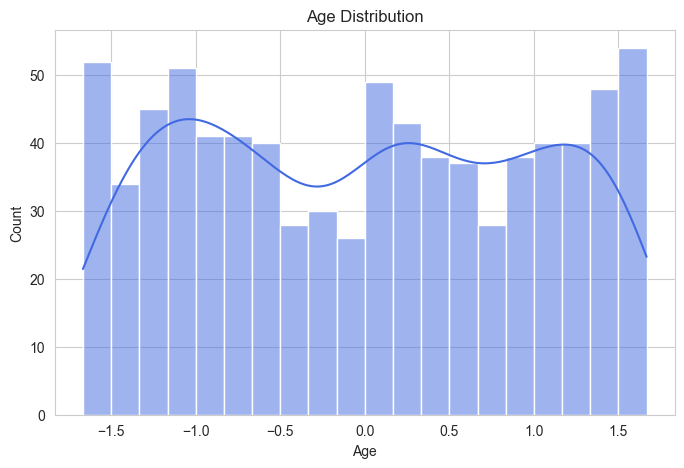

In [63]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='royalblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


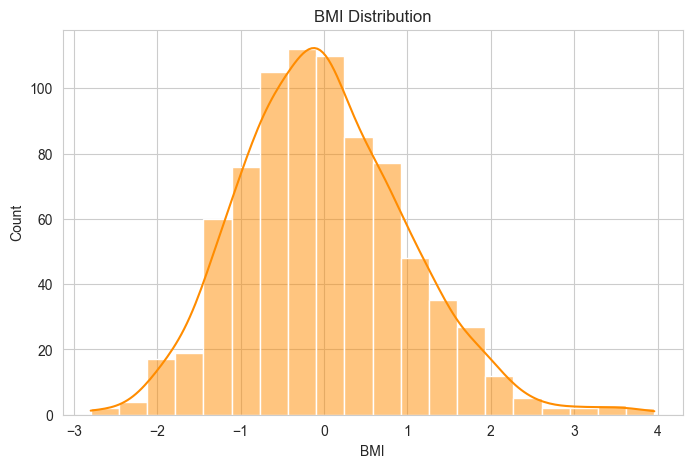

In [64]:
plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'], bins=20, kde=True, color='darkorange')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2821505960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette='coolwarm')


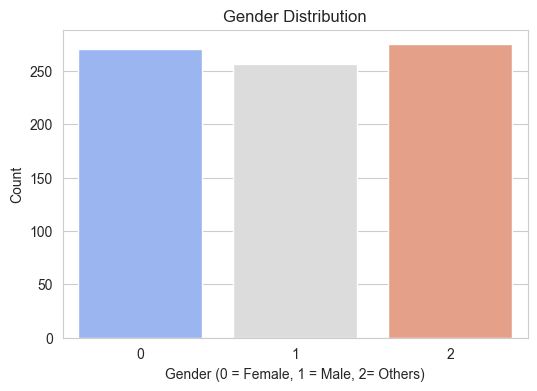

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Gender'], palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male, 2= Others)')
plt.ylabel('Count')
plt.show()


C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\1638785944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Exercise_Intensity'], y=df['Caloric Needs (kcal)'], palette='viridis')


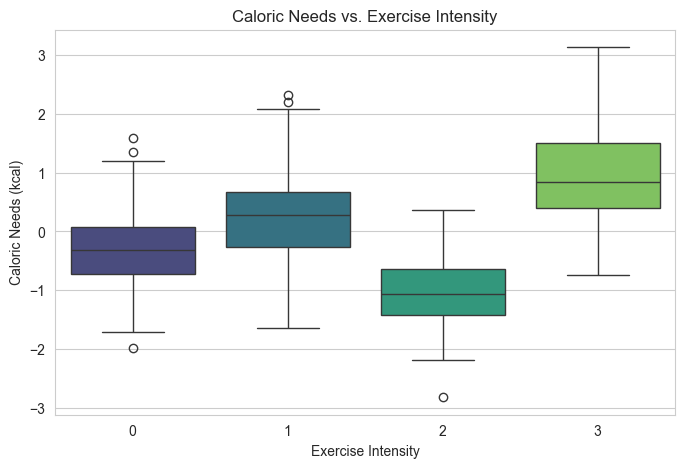

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Exercise_Intensity'], y=df['Caloric Needs (kcal)'], palette='viridis')
plt.title('Caloric Needs vs. Exercise Intensity')
plt.xlabel('Exercise Intensity')
plt.ylabel('Caloric Needs (kcal)')
plt.show()


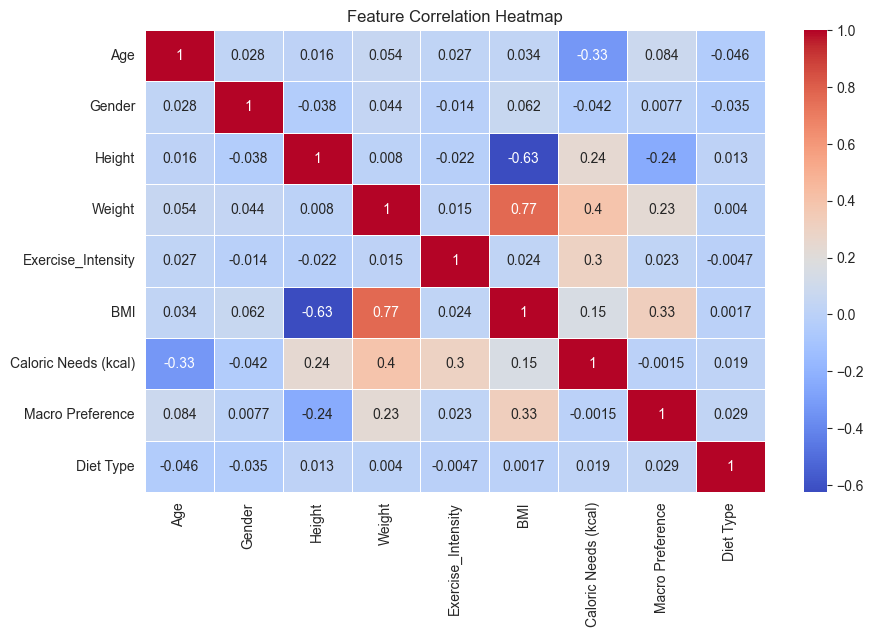

In [67]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


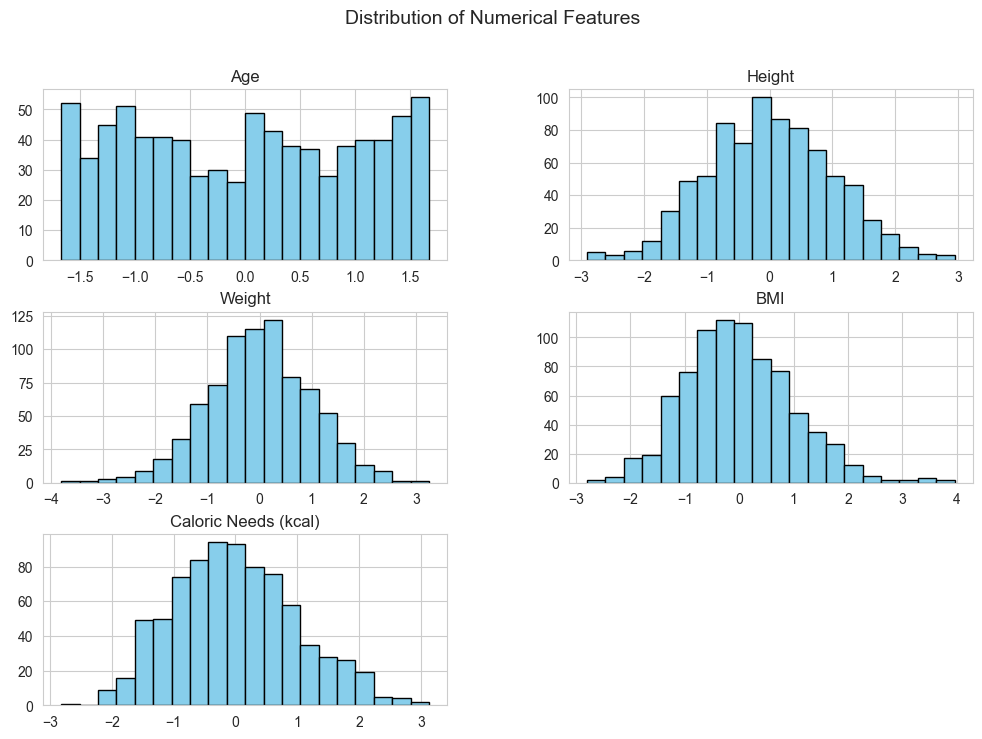

In [68]:
sns.set_style("whitegrid")

# ------- 1️⃣ Numerical Feature Distribution (Histograms & Boxplots) ------- #
numerical_cols = ["Age", "Height", "Weight", "BMI", "Caloric Needs (kcal)"]

# Histograms
df[numerical_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

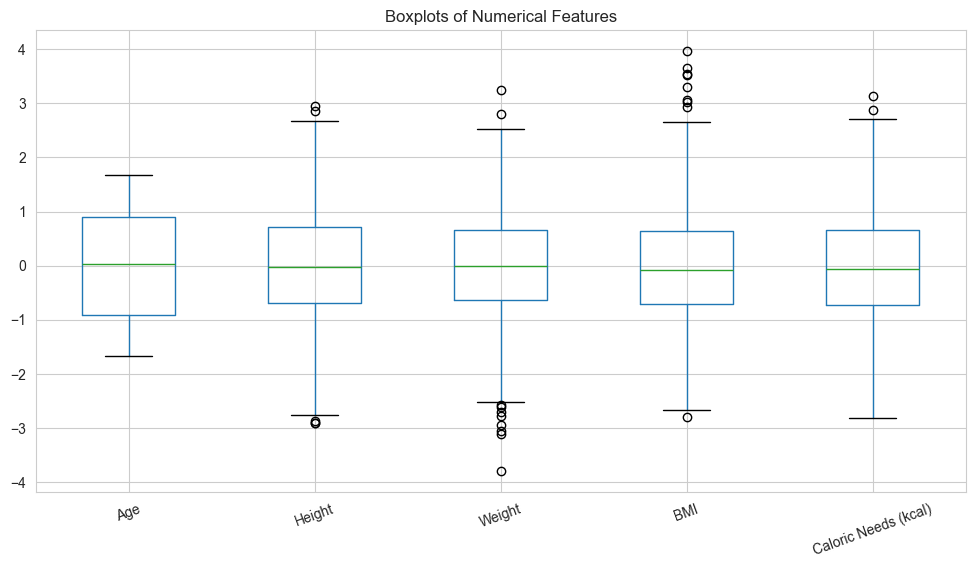

In [69]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=20)
plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\3772410760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis", ax=axes[i])
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\3772410760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis", ax=axes[i])
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\3772410760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis", ax=axes[i])
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\3772410760.py:8: FutureWar

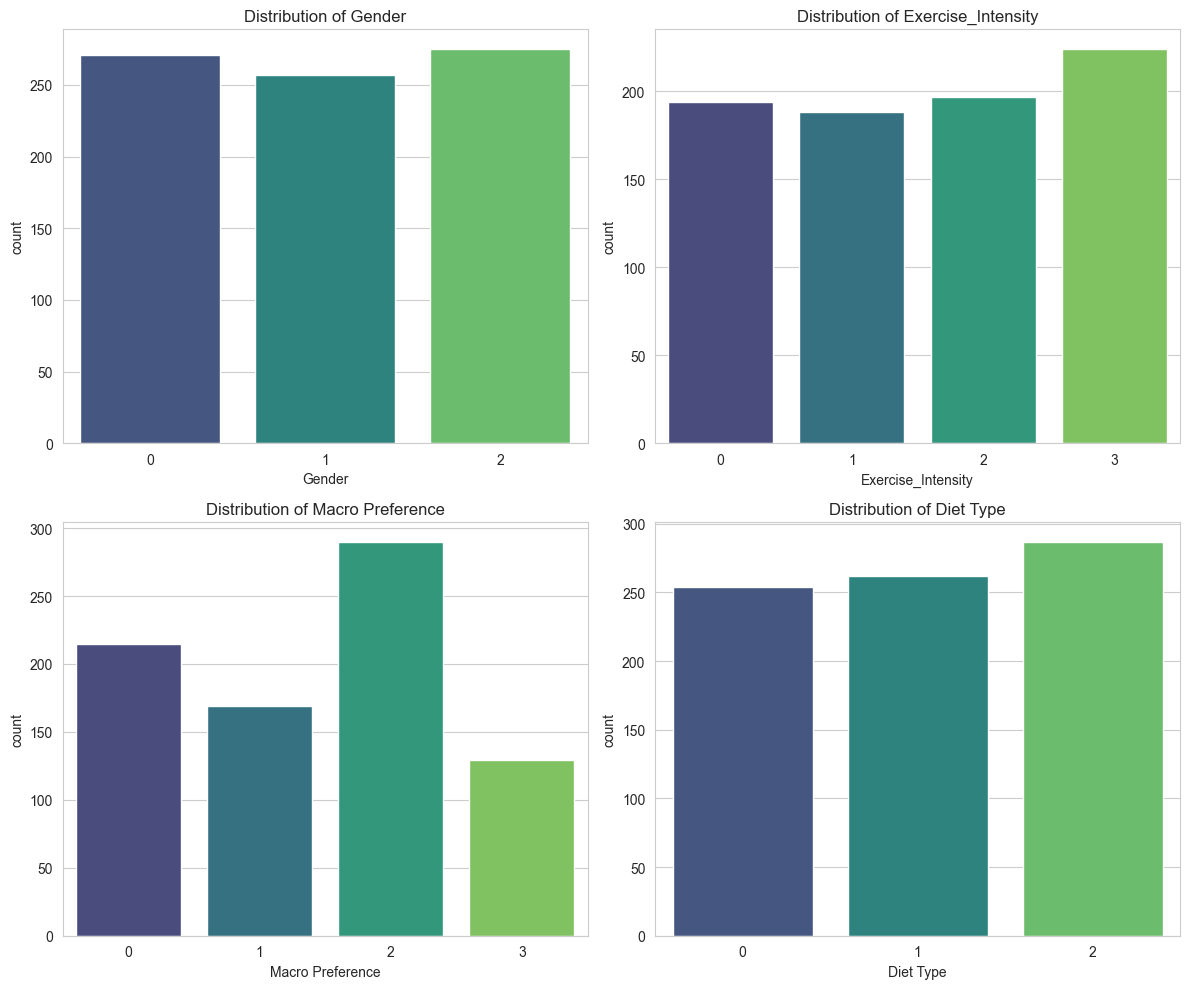

In [70]:
#2️⃣ Categorical Data Analysis (Bar Charts & Count Plots) ------- #
categorical_cols = ["Gender", "Exercise_Intensity", "Macro Preference", "Diet Type"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [71]:
from scipy.stats import zscore
# ------- 3️⃣ Outlier Detection using Z-Score ------- #
# Calculate Z-scores for numerical columns
z_scores = np.abs(df[numerical_cols].apply(zscore))
outliers = (z_scores > 3).sum()

# Display count of outliers per numerical feature
print("Outliers in numerical features:\n", outliers)

Outliers in numerical features:
 Age                     0
Height                  0
Weight                  4
BMI                     7
Caloric Needs (kcal)    1
dtype: int64


In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv(r"C:\Users\madhu\OneDrive\Desktop\project\processed_diet_data.csv")

# Encoding categorical features
label_enc_cols = ["Gender", "Exercise_Intensity", "Macro Preference", "Diet Type", "Stress_Levels"]
onehot_enc_cols = ["Medical_Conditions"]

# Label Encoding for ordinal categorical features
label_encoders = {}
for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future reference

# One-Hot Encoding for non-ordinal categorical features
df = pd.get_dummies(df, columns=onehot_enc_cols, drop_first=True)

# Feature Scaling for numerical features
scaler = StandardScaler()
numeric_cols = ["Age", "Height", "Weight", "BMI", "Caloric Needs (kcal)"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Save the processed dataset
df.to_csv("final_feature_engineered_data.csv", index=False)
print("Feature Engineering Completed! Processed dataset saved as final_feature_engineered_data.csv")


Feature Engineering Completed! Processed dataset saved as final_feature_engineered_data.csv


In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
file_path = "C:/Users/madhu/OneDrive/Desktop/project/final_preprocessed_diet_data.csv"
df = pd.read_csv(file_path)

# Encoding Categorical Variables
label_enc_cols = ["Stress_Levels", "Medical_Conditions"]
for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=["Gender", "Exercise_Intensity", "Macro Preference", "Diet Type"], drop_first=True)

# Standardizing numerical features
scaler = StandardScaler()
num_cols = ["Age", "Height", "Weight", "BMI", "Caloric Needs (kcal)"]
df[num_cols] = scaler.fit_transform(df[num_cols])

# Save the transformed dataset
processed_path = "C:/Users/madhu/OneDrive/Desktop/project/feature_engineered_diet_data.csv"
df.to_csv(processed_path, index=False)

print(f"Feature-engineered dataset saved at: {processed_path}")


Feature-engineered dataset saved at: C:/Users/madhu/OneDrive/Desktop/project/feature_engineered_diet_data.csv


In [74]:
# Display data types of all columns
print(df.dtypes)


Age                     float64
Height                  float64
Weight                  float64
Stress_Levels             int64
Allergies_Gluten           bool
Allergies_Nuts             bool
Allergies_Seafood          bool
Medical_Conditions        int64
BMI                     float64
Caloric Needs (kcal)    float64
Meal Plan                object
Gender_1                   bool
Gender_2                   bool
Exercise_Intensity_1       bool
Exercise_Intensity_2       bool
Exercise_Intensity_3       bool
Macro Preference_1         bool
Macro Preference_2         bool
Macro Preference_3         bool
Diet Type_1                bool
Diet Type_2                bool
dtype: object


In [75]:
#FEATURE SELECTION

In [76]:
'''# correlation analysis (for numerical fe)
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()'''

'# correlation analysis (for numerical fe)\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Compute the correlation matrix\ncorr_matrix = df.corr()\n\n# Plot heatmap\nplt.figure(figsize=(12, 8))\nsns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)\nplt.title("Feature Correlation Heatmap")\nplt.show()'

In [77]:
df = df.drop(columns=["Height"])  # or df.drop(columns=["Weight"])


In [78]:
'''from sklearn.feature_selection import VarianceThreshold

# Set threshold for variance (0.01 means at least 1% variation)
selector = VarianceThreshold(threshold=0.01)
df_selected = pd.DataFrame(selector.fit_transform(df), columns=df.columns[selector.get_support()])

print("Selected Features after Variance Threshold:", df_selected.columns.tolist())'''


'from sklearn.feature_selection import VarianceThreshold\n\n# Set threshold for variance (0.01 means at least 1% variation)\nselector = VarianceThreshold(threshold=0.01)\ndf_selected = pd.DataFrame(selector.fit_transform(df), columns=df.columns[selector.get_support()])\n\nprint("Selected Features after Variance Threshold:", df_selected.columns.tolist())'

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\3693377008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=mi_scores, palette="viridis")


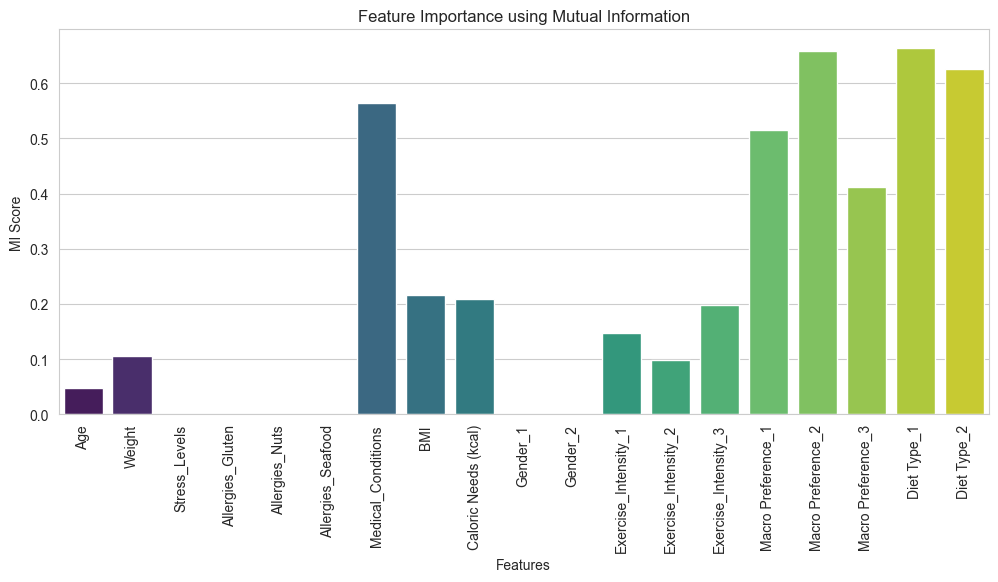

In [79]:
from sklearn.feature_selection import mutual_info_classif

# Define X (features) and y (target)
X = df.drop(columns=["Meal Plan"])  # Assuming 'Meal Plan' is the target
y = df["Meal Plan"]

# Compute MI scores
mi_scores = mutual_info_classif(X, y, discrete_features="auto")

# Plot MI scores
plt.figure(figsize=(12, 5))
sns.barplot(x=X.columns, y=mi_scores, palette="viridis")
plt.xticks(rotation=90)
plt.title("Feature Importance using Mutual Information")
plt.xlabel("Features")
plt.ylabel("MI Score")
plt.show()


In [80]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Using Random Forest as the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)

# Keep selected features
selected_features = X.columns[rfe.support_]
df_final = df[selected_features]

print("Top 10 Selected Features:", selected_features.tolist())


Top 10 Selected Features: ['Age', 'Weight', 'Medical_Conditions', 'BMI', 'Caloric Needs (kcal)', 'Macro Preference_1', 'Macro Preference_2', 'Macro Preference_3', 'Diet Type_1', 'Diet Type_2']


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select only the top 10 features
selected_features = ['Medical_Conditions',
                     'Macro Preference_1', 
                     'Diet Type_1', 'Diet Type_2']

X = df[selected_features]  # Features
y = df['Meal Plan']  # Target variable (Adjust based on your dataset)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8509316770186336
Classification Report:
                                                     precision    recall  f1-score   support

        Avocado Toast, Hummus Wrap, Vegan Smoothie       1.00      1.00      1.00        18
       Chicken Biryani, Oatmeal, Whole Wheat Toast       1.00      1.00      1.00         9
Chicken Wrap, Tuna Sandwich, Stir-fried Vegetables       1.00      1.00      1.00        12
     Grilled Chicken, Eggs, Salmon with Brown Rice       0.84      1.00      0.91        21
         Grilled Fish, Egg Scramble, Chicken Salad       0.00      0.00      0.00         4
          Lentil Soup, Greek Yogurt, Tofu Stir-fry       0.76      1.00      0.86        22
Mushroom Stir-fry, Avocado Bowl, Chia Seed Pudding       0.00      0.00      0.00        13
  Oats, Paneer Salad, Mixed Nuts, Whole Wheat Roti       1.00      1.00      1.00        18
  Quinoa Salad, Chickpea Curry, Peanut Butter Oats       0.55      1.00      0.71        16
     Sweet Potato Bowl, Br

c:\Users\madhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\madhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\madhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [82]:
df = df.drop(columns=["Age", "Weight", "Stress_Levels", "Allergies_Gluten", "Allergies_Nuts", "Allergies_Seafood"])


C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\3370600416.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(feature_names)[sorted_indices], y=importances[sorted_indices], palette="viridis")


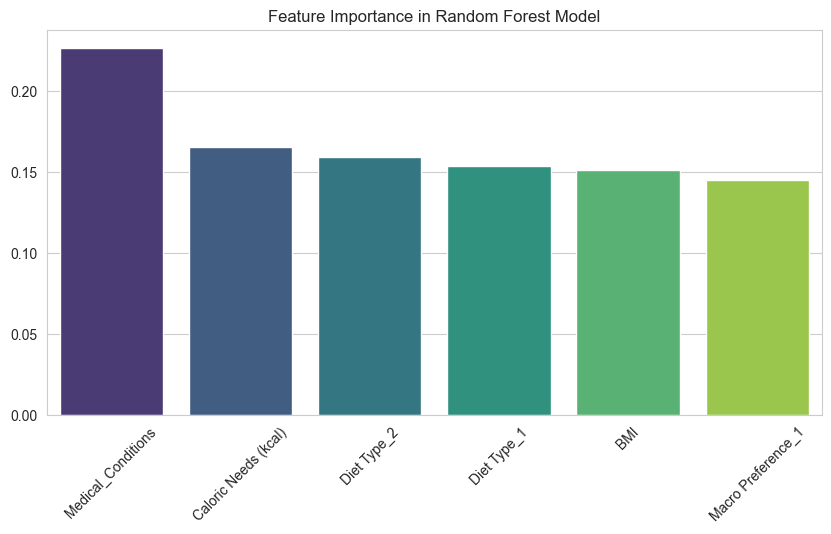

In [83]:
importances = model.feature_importances_
feature_names = selected_features

# Sort and visualize feature importance
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(feature_names)[sorted_indices], y=importances[sorted_indices], palette="viridis")
plt.xticks(rotation=45)
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [102]:
# Train the optimized Random Forest Model
best_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print("Optimized Accuracy:", accuracy_score(y_test, y_pred))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred))


Optimized Accuracy: 0.8509316770186336
Optimized Classification Report:
                                                     precision    recall  f1-score   support

        Avocado Toast, Hummus Wrap, Vegan Smoothie       1.00      1.00      1.00        18
       Chicken Biryani, Oatmeal, Whole Wheat Toast       1.00      1.00      1.00         9
Chicken Wrap, Tuna Sandwich, Stir-fried Vegetables       1.00      1.00      1.00        12
     Grilled Chicken, Eggs, Salmon with Brown Rice       0.84      1.00      0.91        21
         Grilled Fish, Egg Scramble, Chicken Salad       0.00      0.00      0.00         4
          Lentil Soup, Greek Yogurt, Tofu Stir-fry       0.76      1.00      0.86        22
Mushroom Stir-fry, Avocado Bowl, Chia Seed Pudding       0.00      0.00      0.00        13
  Oats, Paneer Salad, Mixed Nuts, Whole Wheat Roti       1.00      1.00      1.00        18
  Quinoa Salad, Chickpea Curry, Peanut Butter Oats       0.55      1.00      0.71        16
     S

c:\Users\madhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\madhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\madhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [86]:
#XGBoost

In [87]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define features & target
X = df[selected_features]
y = df['Meal Plan']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))



XGBoost Accuracy: 0.39751552795031053
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.61      0.58        18
           1       0.43      0.50      0.46        12
           2       0.18      0.22      0.20         9
           3       0.40      0.30      0.34        20
           4       0.38      0.43      0.40         7
           5       0.46      0.48      0.47        23
           6       0.25      0.17      0.20        12
           7       0.47      0.38      0.42        21
           8       0.41      0.56      0.47        16
           9       0.50      0.14      0.22         7
          10       0.36      0.45      0.40        11
          11       0.00      0.00      0.00         5

    accuracy                           0.40       161
   macro avg       0.37      0.35      0.35       161
weighted avg       0.40      0.40      0.39       161



In [88]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Fit the model using encoded labels
xgb_model.fit(X_train, y_train_encoded)

# Predictions (these will be numeric)
y_pred_xgb = xgb_model.predict(X_test)

# Optionally, convert predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred_xgb)

In [89]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable (before training)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [90]:
# Save label encoder
import joblib
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [105]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define features and target
selected_features = ['Medical_Conditions', 'BMI', 'Caloric Needs (kcal)', 'Macro Preference_1', 'Diet Type_1', 'Diet Type_2']
X = df[selected_features]
y = df['Meal Plan']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM model with increased L1 and L2 regularization
model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.03,
    lambda_l1=1.5,  # Increased L1 regularization (try values like 0.1, 0.5, 1.0)
    lambda_l2=1.5,  # Increased L2 regularization (try values like 0.1, 0.5, 1.0)
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("LightGBM Accuracy:", accuracy)
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 6
[LightGBM] [Info] Start training from score -2.475604
[LightGBM] [Info] Start training from score -2.680399
[LightGBM] [Info] Start training from score -2.421537
[LightGBM] [Info] Start training from score -2.201908
[Ligh

In [106]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
Train Accuracy: 0.9673
Test Accuracy: 0.9193


In [107]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  # 5-Fold Cross-Validation
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 6
[LightGBM] [Info] Start training from score -2.404145
[LightGBM] [Info] Start training from score -2.726919
[LightGBM] [Info] Start training from score -2.457255
[LightGBM] [Info] Start training from score -2.174129
[Ligh

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2975207525.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[sorted_idx], y=[selected_features[i] for i in sorted_idx], palette="viridis")


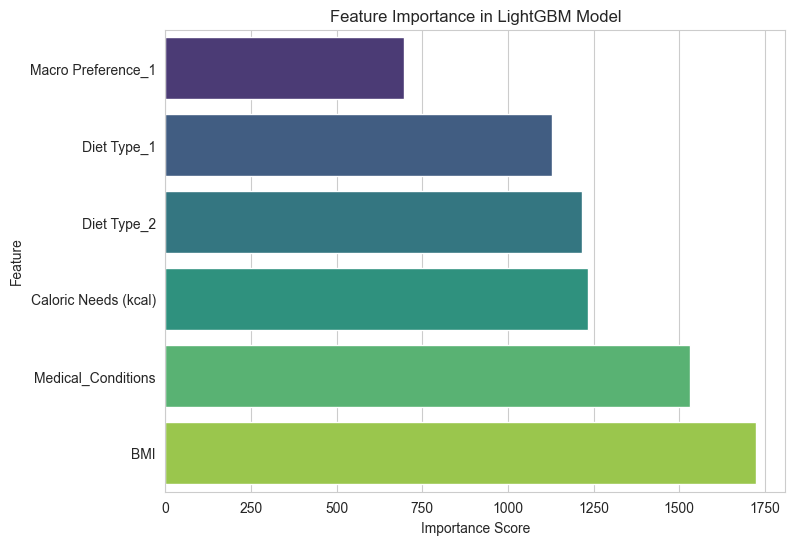

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance[sorted_idx], y=[selected_features[i] for i in sorted_idx], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in LightGBM Model")
plt.show()


In [95]:
import optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 10, 50),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 5),
    }
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    return accuracy_score(y_test, model.predict(X_test))

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, show_progress_bar=True)  # Limits output
optuna.logging.set_verbosity(optuna.logging.WARNING)

print(study.best_params)


  0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] lambda_l1 is set=2.1949065414377187, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1949065414377187
[LightGBM] [Warning] lambda_l2 is set=0.2751709494443272, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2751709494443272
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=2.1949065414377187, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1949065414377187
[LightGBM] [Warning] lambda_l2 is set=0.2751709494443272, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2751709494443272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 6
[LightGBM] [Info] Start training from score -2.475604
[LightGBM] [Info] Start training from score -2.

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] lambda_l1 is set=3.9558653330842675, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9558653330842675
[LightGBM] [Warning] lambda_l2 is set=0.4278940237254437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4278940237254437
[LightGBM] [Warning] lambda_l1 is set=0.15747836239161708, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15747836239161708
[LightGBM] [Warning] lambda_l2 is set=4.272094633686749, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.272094633686749
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=0.15747836239161708, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15747836239161708
[LightGBM] [Warning] lambda_l2 is set=4.272094633686749, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.272094633686749
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `fo

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] lambda_l2 is set=0.20720551311044189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20720551311044189
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=1.915061584518269, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.915061584518269
[LightGBM] [Warning] lambda_l2 is set=0.20720551311044189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20720551311044189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 6
[LightGBM] [Info] Start training from score -2.475604
[LightGBM] [Info] Start training from score -2.680399
[LightGBM] [Info] Start training from score -2.421537
[LightGBM] [Info] Start training from score -2.201908
[LightGBM] [Info

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] lambda_l1 is set=1.9915173306416163, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9915173306416163
[LightGBM] [Warning] lambda_l2 is set=0.7630304239105243, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7630304239105243
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=1.9915173306416163, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9915173306416163
[LightGBM] [Warning] lambda_l2 is set=0.7630304239105243, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7630304239105243
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 6
[LightGBM] [Info] Start training from score -2.475604
[LightGBM] [Info] Start training from score -2.

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] lambda_l2 is set=0.5285595107785719, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5285595107785719
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=0.3654339462582841, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3654339462582841
[LightGBM] [Warning] lambda_l2 is set=0.5285595107785719, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5285595107785719
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 6
[LightGBM] [Info] Start training from score -2.475604
[LightGBM] [Info] Start training from score -2.680399
[LightGBM] [Info] Start training from score -2.421537
[LightGB

C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 0.1, 5),
C:\Users\madhu\AppData\Local\Temp\ipykernel_13416\2422114729.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l

[LightGBM] [Warning] lambda_l1 is set=0.4609648735857848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4609648735857848
[LightGBM] [Warning] lambda_l2 is set=0.2197210084247849, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2197210084247849
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=0.4609648735857848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4609648735857848
[LightGBM] [Warning] lambda_l2 is set=0.2197210084247849, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2197210084247849
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 6
[LightGBM] [Info] Start training from score -2.475604
[LightGBM] [Info] Start training from score -2.

In [96]:
final_model = lgb.LGBMClassifier(
    n_estimators=270,
    learning_rate=0.0651,
    num_leaves=16,
    lambda_l1=0.1897,
    lambda_l2=0.5847,
    random_state=42
)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))


[LightGBM] [Warning] lambda_l1 is set=0.1897, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1897
[LightGBM] [Warning] lambda_l2 is set=0.5847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5847
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=0.1897, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1897
[LightGBM] [Warning] lambda_l2 is set=0.5847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5847
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 6
[LightGBM] [Info] Start training from score -2.475604
[LightGBM] [Info] Start training from score -2.680399
[LightGBM] [Info] Start training from score -2.421537
[LightGBM] [Info] Start training fr

In [97]:
import joblib
joblib.dump(final_model, "diet_plan_model.pkl")


['diet_plan_model.pkl']

In [98]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv(r"C:\Users\madhu\OneDrive\Desktop\project\feature_engineered_diet_data.csv")  # Use your actual dataset file

# Encode target variable (Meal Plan)
label_encoder = LabelEncoder()
df['Meal Plan Encoded'] = label_encoder.fit_transform(df['Meal Plan'])

# Save the updated encoder
joblib.dump(label_encoder, "label_encoder.pkl")

# Save the dataset with the encoded meal plans
df.to_csv("your_encoded_dataset.csv", index=False)

print("✅ Label Encoder updated successfully!")


✅ Label Encoder updated successfully!


In [99]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv(r"C:\Users\madhu\OneDrive\Desktop\project\feature_engineered_diet_data.csv")  # Replace with actual dataset file

# Ensure Meal Plan is categorical
df['Meal Plan'] = df['Meal Plan'].astype(str)  # Convert to string to avoid unseen errors

# Encode Meal Plan
label_encoder = LabelEncoder()
df['Meal Plan Encoded'] = label_encoder.fit_transform(df['Meal Plan'])

# Save the updated label encoder
joblib.dump(label_encoder, "label_encoder.pkl")

# Save the dataset with encoded values (optional for debugging)
df.to_csv("your_encoded_dataset.csv", index=False)

print("✅ Label Encoder retrained successfully! 🎯")


✅ Label Encoder retrained successfully! 🎯


In [100]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("your_encoded_dataset.csv")  # Use the newly encoded dataset

# Load the updated label encoder
label_encoder = joblib.load("label_encoder.pkl")

# Features & target
selected_features = ['Medical_Conditions', 'Macro Preference_1', 'Diet Type_1', 'Diet Type_2']
X = df[selected_features]
y = df['Meal Plan Encoded']  # Use encoded meal plans

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM model
model = lgb.LGBMClassifier(n_estimators=200, max_depth=8, learning_rate=0.03, lambda_l1=1.5, lambda_l2=1.5, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "diet_plan_model.pkl")

print("✅ Model retrained successfully! 🚀")


[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 4
[LightGBM] [Info] Start training from score -2.475604
[LightGBM] [Info] Start training from score -2.680399
[LightGBM] [Info] Start training from score -2.421